# Spulen

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
I = np.array([0,1,2])
U = np.array([0,1,2])

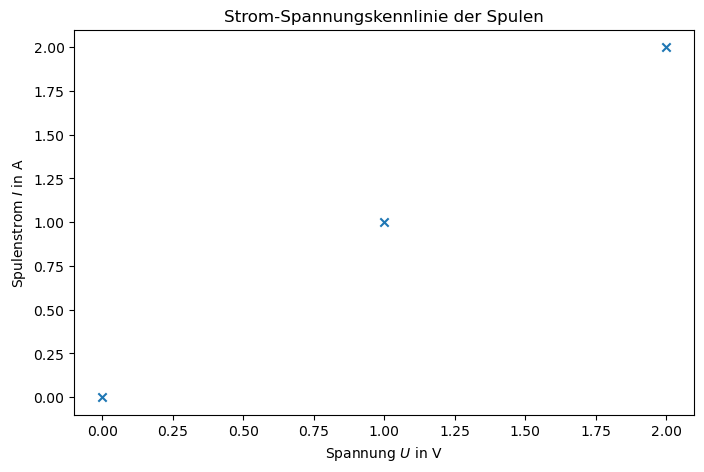

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(U,I,marker='x')
ax.set_xlabel('Spannung $U$ in V')
ax.set_ylabel('Spulenstrom $I$ in A')
plt.title('Strom-Spannungskennlinie der Spulen')
plt.savefig('figures/strom_spannungs_kennlinie_spulen.pdf')